I was always interested in marketing and also videogames. The following analysis is the product of these two interests and i wanted to conduct a market analysis in volume. This is one of the first steps into marketing, as it is a vital part to understand the broad strockes of the sector. I know this analysis is not complete, but I wanted to try to imitate what you would do in a marketing desing and strategy agency.

 The following questions are asked from this table:

What are the games with the most platforms? *

Which platform sold the most games?*
    How does that correlate with the number of consoles sold? (Attachment-rate)
    
Which year sold the most games?*

Which region sold the most?*
    How does that correlate with the population?

What is the diffrence between markets on a global scale?*

How many games were sold outside of the three regions? What percentage?*

Which genres are the most succesful?*

What publishers are the most succesful?*

[Source](https://www.kaggle.com/datasets/connorboyce/vgsalesnumber1)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
vgsales = pd.read_csv('/Users/beniciodaniel/Documents/GitHub/Capstoneproject.benicio_daniel/vgsales.csv')
vgsales.index.name = None
print(vgsales.dtypes)
vgsales_shape = vgsales.shape
print(vgsales_shape)


Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object
(16598, 11)


In [18]:
vgsales.head(100)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
98,99,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37


In [19]:
#find outliers
vgsales.loc[vgsales["Year"] > 2017 ]


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [20]:
#drop outliers
vgsales.drop(5957, axis = 0, inplace=True)

In [21]:
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16597.000000,16326.000000,16597.000000,16597.000000,16597.000000,16597.000000,16597.000000
mean,8300.746340,2006.405611,0.264667,0.146661,0.077786,0.048065,0.537456
std,4791.963823,5.828189,0.816708,0.505365,0.309299,0.188594,1.555074
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8301.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12450.000000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Total count of duplicates: 7880

Games sold on multiple platforms:
Name
Need for Speed: Most Wanted    12
Ratatouille                     9
FIFA 14                         9
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
                               ..
Fantasia: Music Evolved         2
Get Up and Dance                2
Cabela's Outdoor Adventures     2
Manhunt                         2
EyePet                          2
Name: count, Length: 2775, dtype: int64


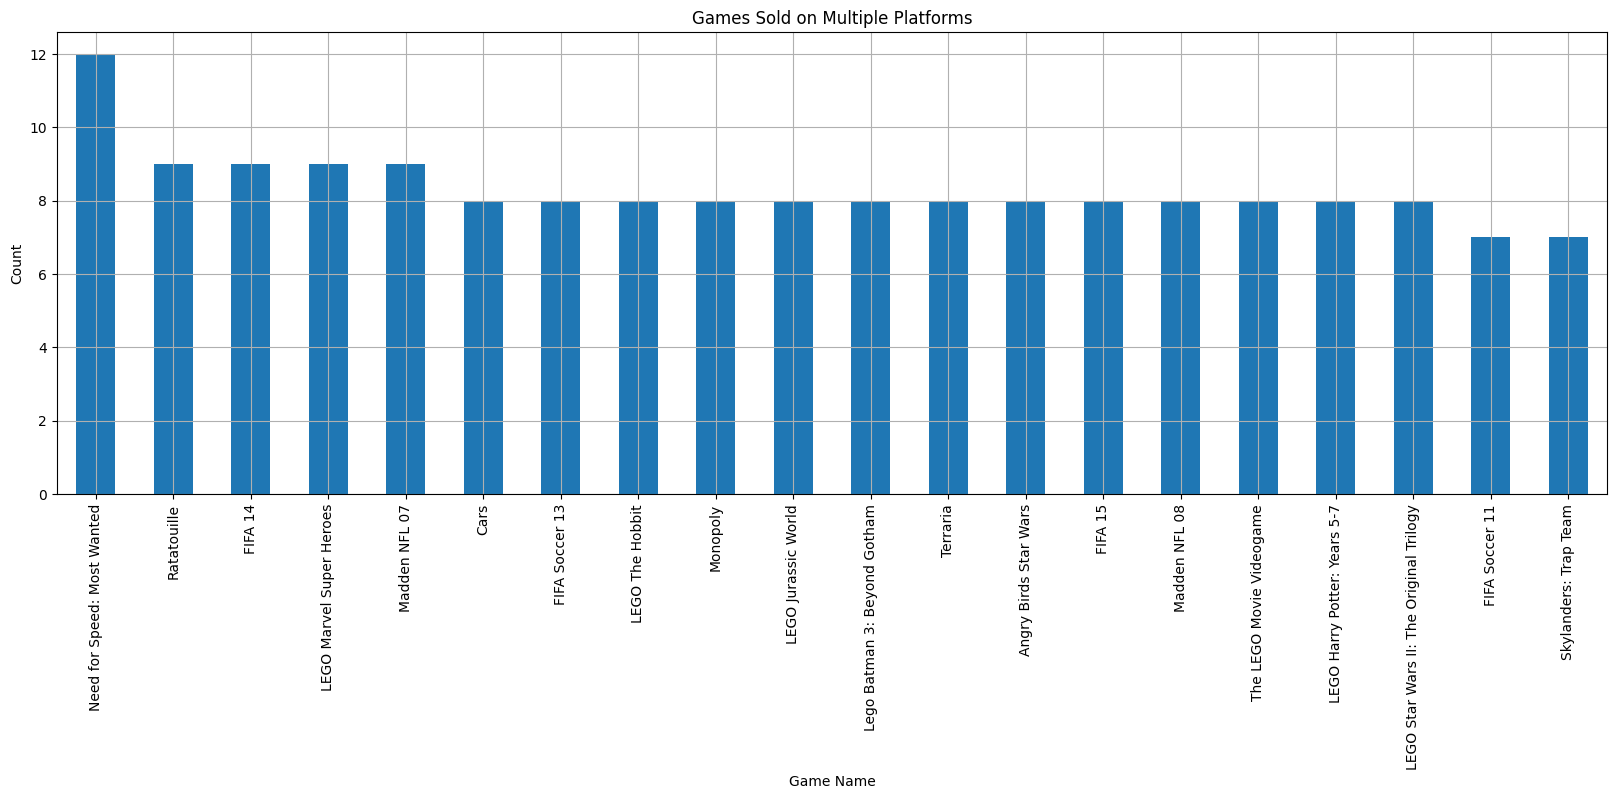

<Figure size 1000x600 with 0 Axes>

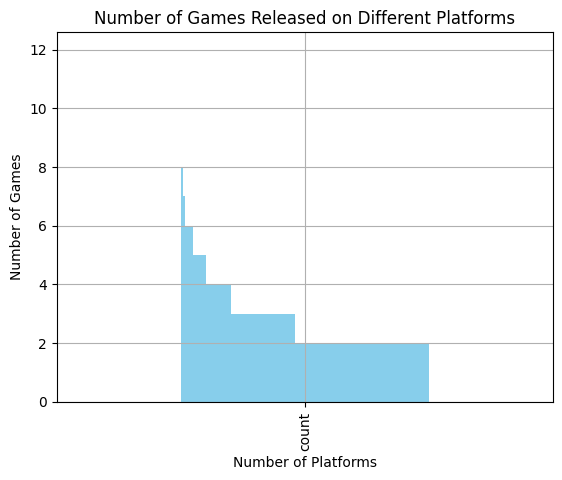

In [22]:
# Which games were sold on the most platforms?
# Count the occurrences of each game in the DataFrame
game_counts = vgsales['Name'].value_counts()

# Filter games that were sold on multiple platforms
games_on_multiple_platforms = game_counts[game_counts > 1]

# Print the total count of duplicates and the list of games
total_count_duplicates = games_on_multiple_platforms.sum()
print("Total count of duplicates:", total_count_duplicates)

print("\nGames sold on multiple platforms:")
print(games_on_multiple_platforms)

# Plotting
plt.figure(figsize=(20, 6))
games_on_multiple_platforms.head(20).plot(kind='bar', grid = True)
plt.title('Games Sold on Multiple Platforms')
plt.xlabel('Game Name')
plt.ylabel('Count')
plt.show()

df = pd.DataFrame(games_on_multiple_platforms).transpose()
# Create a bar plot
plt.figure(figsize=(10, 6))
df.plot(kind='bar', legend=False, color='skyblue',grid=True)
plt.title('Number of Games Released on Different Platforms')
plt.xlabel('Number of Platforms')
plt.ylabel('Number of Games')
plt.show()


Platform
2600      97.0
3DO        0.0
3DS      247.0
DC        16.0
DS       822.0
GB       255.0
GBA      318.0
GC       199.0
GEN       28.0
GG         0.0
N64      219.0
NES      251.0
NG         1.0
PC       259.0
PCFX       0.0
PS       731.0
PS2     1256.0
PS3      958.0
PS4      278.0
PSP      296.0
PSV       62.0
SAT       34.0
SCD        2.0
SNES     200.0
TG16       0.0
WS         1.0
Wii      927.0
WiiU      82.0
X360     980.0
XB       258.0
XOne     141.0
Name: Global_Sales, dtype: float64


<Axes: xlabel='Platform'>

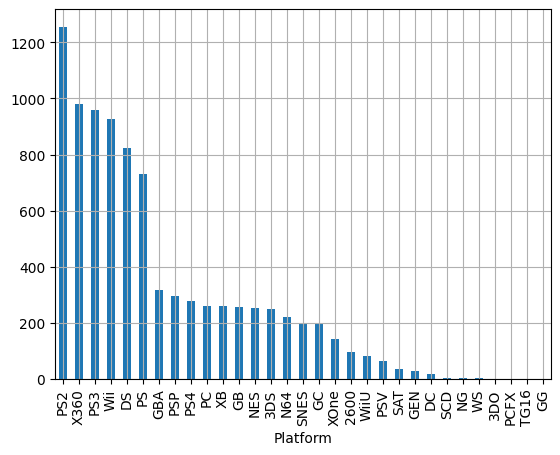

In [23]:
#what are the platforms with the most sold games in volume?
consoles_sell = vgsales.groupby("Platform")["Global_Sales"].sum().round()
print(consoles_sell)
sorted_consoles_sell = consoles_sell.sort_values(ascending=False)
sorted_consoles_sell.plot(kind="bar", grid = True)

Total games sold in each year:
      Year  Total_Sales
28  2008.0       678.90
29  2009.0       667.30
27  2007.0       611.13
30  2010.0       600.45
26  2006.0       521.04
31  2011.0       515.99
25  2005.0       459.94
24  2004.0       419.31
22  2002.0       395.52
33  2013.0       368.11
32  2012.0       363.54
23  2003.0       357.85
34  2014.0       337.05
21  2001.0       331.47
35  2015.0       264.44
18  1998.0       256.47
19  1999.0       251.27
20  2000.0       201.56
17  1997.0       200.98
16  1996.0       199.15
15  1995.0        88.11
14  1994.0        79.17
12  1992.0        76.16
9   1989.0        73.45
36  2016.0        70.93
5   1985.0        53.94
4   1984.0        50.36
10  1990.0        49.39
8   1988.0        47.22
13  1993.0        45.98
6   1986.0        37.07
1   1981.0        35.77
11  1991.0        32.23
2   1982.0        28.86
7   1987.0        21.74
3   1983.0        16.79
0   1980.0        11.38
37  2017.0         0.05


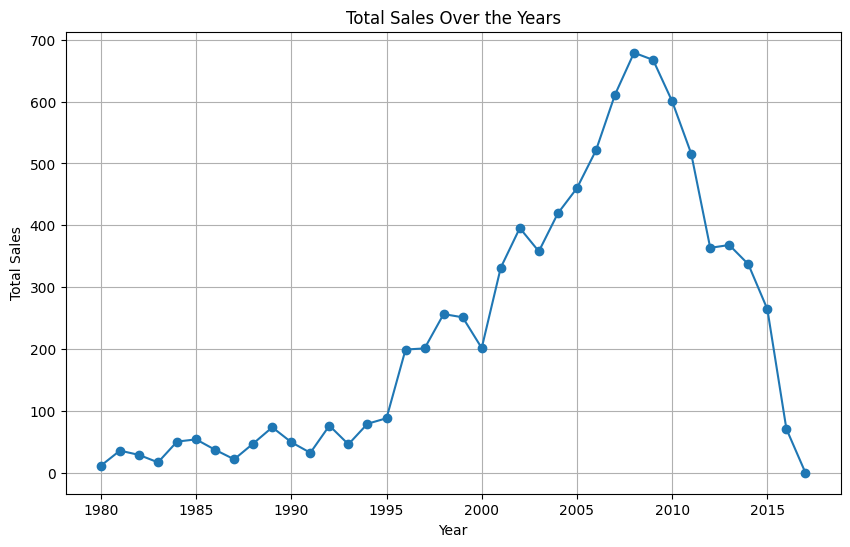

In [24]:
#What years sold the most games
years_sell = vgsales.groupby("Year")["Global_Sales"].sum().round(2).reset_index()
years_sell.columns = ["Year", "Total_Sales"]
sorted_years_sell = years_sell.sort_values(by="Total_Sales", ascending=False)

print("Total games sold in each year:")
print(sorted_years_sell)
#graphics now
plt.figure(figsize=(10, 6))
plt.plot(years_sell["Year"], years_sell["Total_Sales"], marker='o', linestyle='-')
plt.title('Total Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Total sales by region:
JP_Sales        1291.02
EU_Sales        2434.13
NA_Sales        4392.68
Other_Sales      797.73
Global_Sales    8920.15
dtype: float64

Percentage of global sales:
JP_Sales         14.473075
EU_Sales         27.287994
NA_Sales         49.244463
Other_Sales       8.943011
Global_Sales    100.000000
dtype: float64


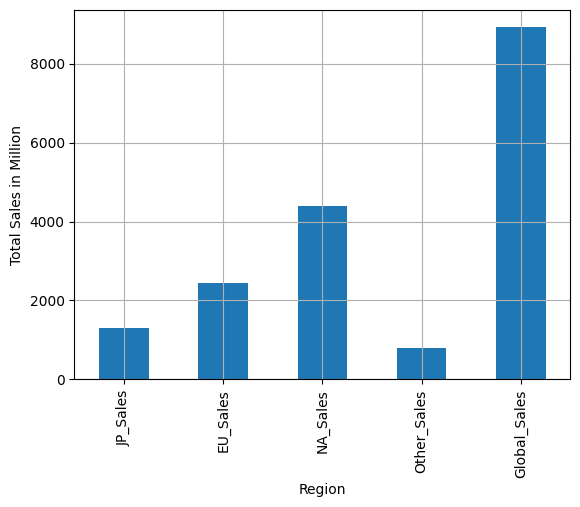

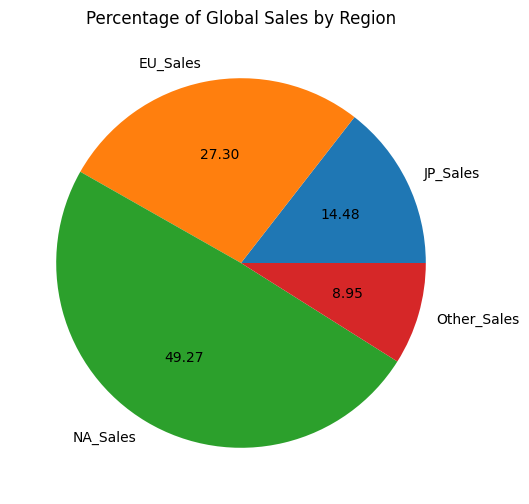

In [25]:
#what regions sold the most?
region_sales = vgsales[["JP_Sales", "EU_Sales", "NA_Sales", "Other_Sales", "Global_Sales"]].sum().round(2)

# Calculate total global sales
gl_total_sales = region_sales["Global_Sales"]

# Calculate percentages of global sales for each region
region_sales_percentage = region_sales / gl_total_sales * 100

# Display the results and declare volume (not value) and format with unit
print("Total sales by region:")
print(region_sales)
print("\nPercentage of global sales:")
print(region_sales_percentage)

region_sales.plot(kind="bar", grid = True)
plt.xlabel("Region")
plt.ylabel("Total Sales in Million")
plt.show()

#show the percentage without the global sales, because it is 100%
plt.figure(figsize=(12, 6))
region_sales_percentage.head(4).plot(kind="pie", autopct="%.2f")
plt.title('Percentage of Global Sales by Region')
plt.show()

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       391.91
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64


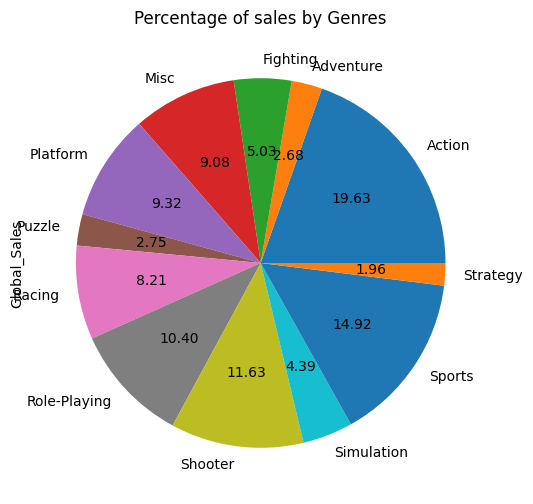

In [26]:
#what genres are most succesful
genre_sell = vgsales.groupby("Genre") ["Global_Sales"].sum().round(2)
print(genre_sell.sort_values(ascending = False))
plt.figure(figsize=(10,6))
genre_sell.plot(kind="pie", autopct="%.2f")
plt.title('Percentage of sales by Genres')
plt.show()

Publisher
Nintendo                       1786.56
Electronic Arts                1110.32
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.43
                                ...   
Ongakukan                         0.01
Commseed                          0.01
Takuyo                            0.01
Boost On                          0.01
Naxat Soft                        0.01
Name: Global_Sales, Length: 578, dtype: float64


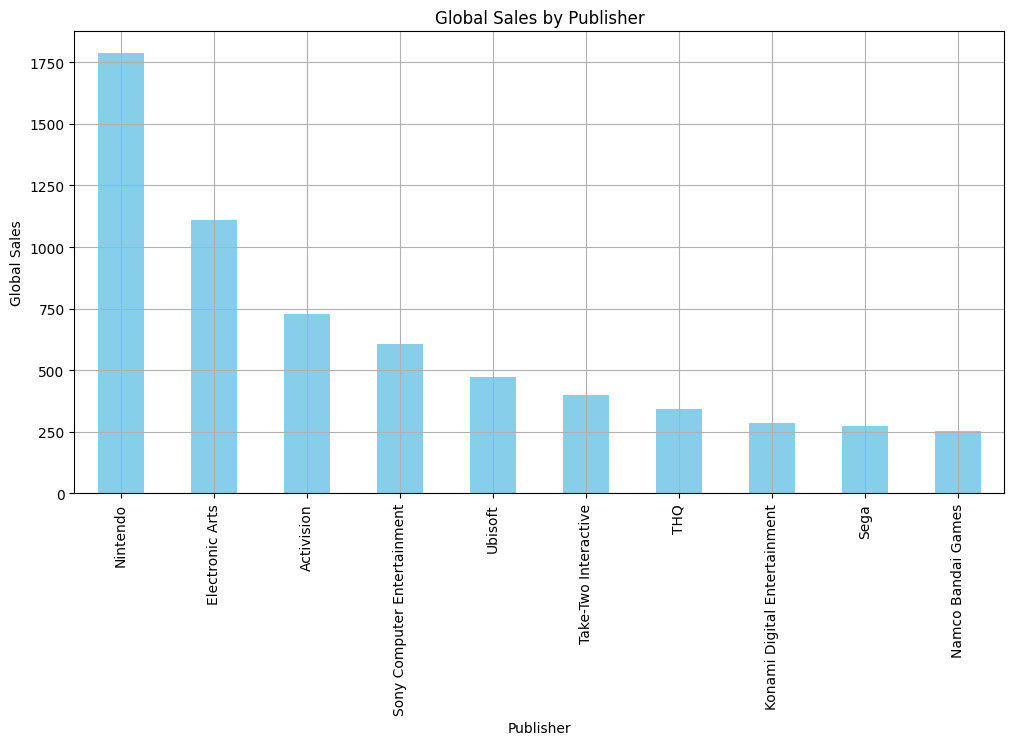

In [27]:
#who are the most succesful publishers?
publisher_sell = vgsales.groupby("Publisher")["Global_Sales"].sum().round(2).sort_values(ascending= False)
print(publisher_sell)

plt.figure(figsize=(12, 6))
publisher_sell.head(10).plot(kind="bar",grid = True, color="skyblue")
plt.title('Global Sales by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.show()

I was always interested in marketing and also videogames. The following analysis is the product of these two interests and i wanted to conduct a market analysis in volume. This is one of the first steps into marketing, as it is a vital part to understand the broad strockes of the sector. I know this analysis is not complete, but I wanted to try to imitate what you would do in a marketing desing and strategy agency. Extending the simulated market- and competitor-research of  the previous Project above, I wanted to extedn into sentiment analysis and try to look for what people are saying and what kind of insights you could generate. Meta critic is a aggregation site for all kinds of media, but rose to popularity with videogames. They get the short version of the reviews and scores for games from news outlets and also general users.
I imported the review data from Meta critic by finding the url by hand and imported it myself.
I tried the approach for the first ten games of the vgsales.csv, but so you could extend it, that it could be extended to so for the rest of the list. I also wanted to include the price of the games at lauch, to get an estimator of these things.

https://www.metacritic.com/game/wii-sports/critic-reviews/?platform=wii

The question I am asking are:
What are the most frequent words as a whole?
What is the distribution in score (media score rating) over the games?
Average score per publisher?
Average score per genre?
Most frequent words per genre

This is to webscrape metacritic, I had to find a way to get a website per the name in the vgsales.csv. But the name in the csv doesnt alway line up with the name on the website. Therefore I used the search function of the website and took the link that goes to a review site. In my case it was the 19th link, but that can change in some cases

In [86]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
import re
# Assuming vg_sales is a DataFrame loaded from 'vgsales.csv'
vg_sales = pd.read_csv('vgsales.csv')

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
n = 0
base_url = 'https://www.metacritic.com'

# Open a CSV file to write the data
with open('game_reviews.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header row
    writer.writerow(['Game', 'Score', 'Review', 'Publication', 'Unedited Game Name'])
    #we will do this for about 1000 rows
    for index, row in vg_sales.iloc[:1001].iterrows():
        n = n+1
        print(n)
        unedited_game_name = row['Name']
        #we have to edit the game name so that it reads in the url
        game = row['Name'].replace(' ', '%20').lower()
        if '/' in game:
        # Split the string on "/" and take the first part, this is a eventuality for names that have two versions (i.e. pokemon)
            game = game.split('/')[0]
        search_url = f'https://www.metacritic.com/search/{game}/'
        print('This is what I put in:', {search_url})
        response = requests.get(search_url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Iterate through all `a` tags and check if the link contains '/game/' followed by another path element
        game_links = []
        for link in soup.find_all('a', href=True):
                if '/game/' in link['href']:
                    game_link = link['href']
                    game_links.append(game_link)

        # Extract the nineteenth link
        second_link = game_links[19]
        if not second_link.startswith('http'):
                second_link = base_url + second_link
        print('This is what I got out:', {second_link})
        # Fetch the detailed page for the second link
        detailed_response = requests.get(second_link, headers=headers)
        detailed_soup = BeautifulSoup(detailed_response.content, 'html.parser')
        pattern = r'quote:"([^"]+)".*?publicationName:"([^"]+)".*?score:(\d+)'
        matches = re.findall(pattern, str(detailed_soup), re.DOTALL)

        if matches:
                for quote, publication_name, score in matches[:10]:  # Just an example to limit to the first ten match
                    writer.writerow([unedited_game_name, score, quote, publication_name, game ])
        else:
            # Write NA if no matches found
            writer.writerow([game, 'NA', 'NA', 'NA', unedited_game_name])


1
This is what I put in: {'https://www.metacritic.com/search/wii%20sports/'}
This is what I got out: {'https://www.metacritic.com/game/wii-sports/'}
2
This is what I put in: {'https://www.metacritic.com/search/super%20mario%20bros./'}
This is what I got out: {'https://www.metacritic.com/game/super-mario-advance-4-super-mario-bros-3/'}
3
This is what I put in: {'https://www.metacritic.com/search/mario%20kart%20wii/'}
This is what I got out: {'https://www.metacritic.com/game/mario-kart-wii/'}
4
This is what I put in: {'https://www.metacritic.com/search/wii%20sports%20resort/'}
This is what I got out: {'https://www.metacritic.com/game/wii-sports-resort/'}
5
This is what I put in: {'https://www.metacritic.com/search/pokemon%20red/'}
This is what I got out: {'https://www.metacritic.com/game/pokemon-firered-version/'}
6
This is what I put in: {'https://www.metacritic.com/search/tetris/'}
This is what I got out: {'https://www.metacritic.com/game/tetris-effect-connected/'}
7
This is what I put

IndexError: list index out of range

In [52]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
import re
import gensim
from gensim import corpora

# Ensure necessary NLTK downloads
nltk.download('stopwords')
nltk.download('wordnet')

# Prepare the stop words set
stop_words = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

# Function to clean and preprocess a single document
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop_words])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# Read the CSV file
gamerevs = pd.read_csv('game_reviews.csv')
gamerevs['Review'] = gamerevs['Review'].fillna('').astype(str)

# Group by 'Game' and concatenate reviews
grouped_df = gamerevs.groupby('Game')['Review'].agg(' '.join).reset_index()

# Process each concatenated review
processed_reviews = [clean(review) for review in grouped_df['Review']]

# Split processed reviews into lists of words for the document-term matrix
doc_clean = [review.split() for review in processed_reviews]

# Create a Gensim dictionary
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Now, `doc_term_matrix` is ready for further analysis with Gensim models, e.g., LDA for topic modeling.
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=100)
print(ldamodel.print_topics(num_topics=5, num_words=5))



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beniciodaniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/beniciodaniel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[(0, '0.023*"game" + 0.007*"one" + 0.005*"new" + 0.005*"best" + 0.005*"experience"'), (1, '0.035*"game" + 0.007*"one" + 0.006*"new" + 0.006*"fun" + 0.006*"best"')]


In this cell I tried to do topic analysis, but it didnt, work, since there are no insights to be gained from these

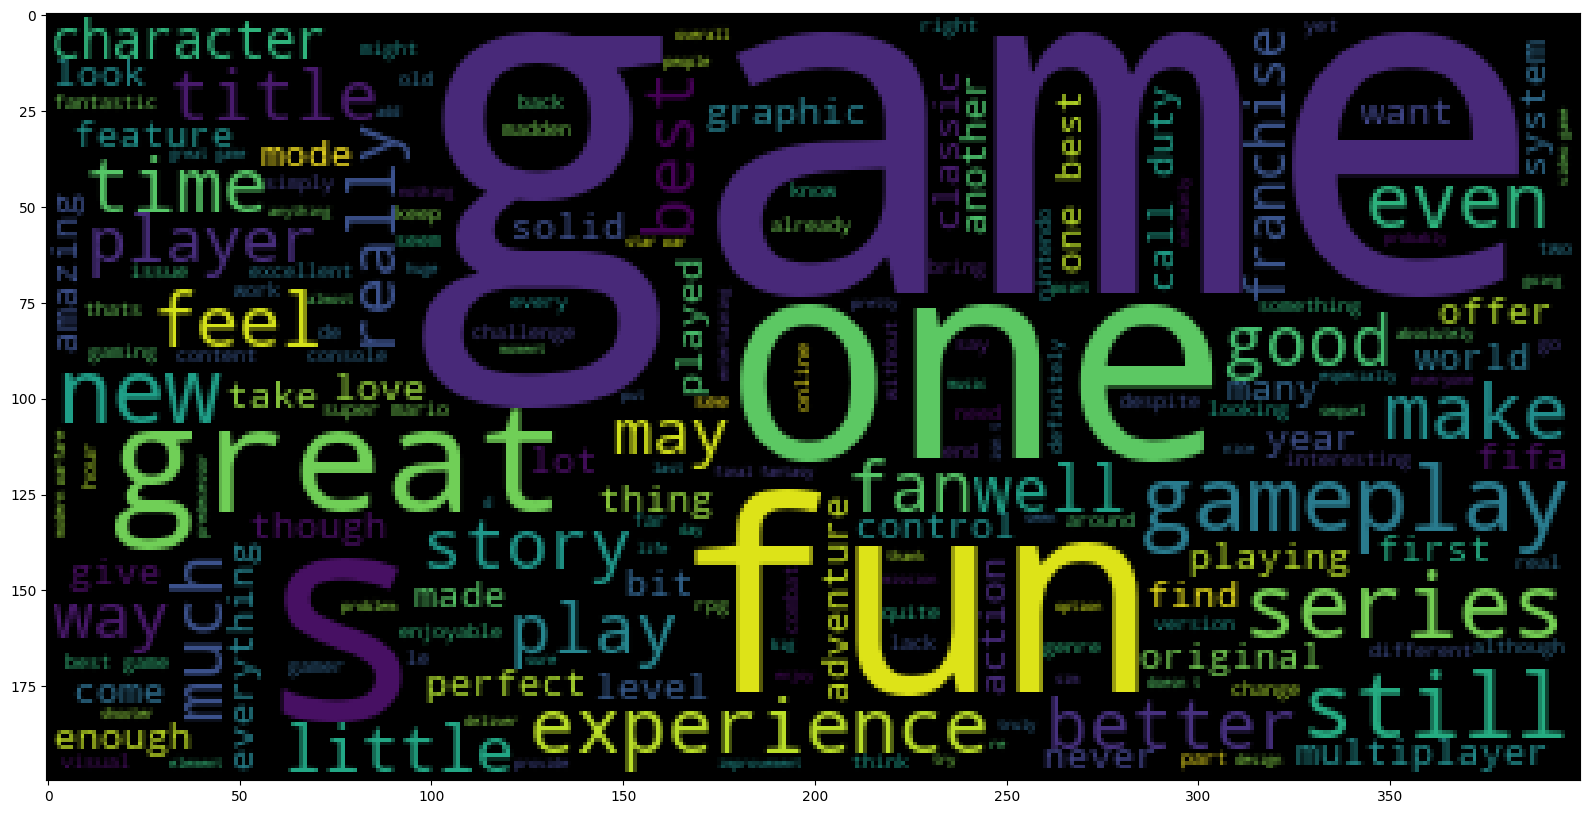

In [65]:
from collections import Counter
import matplotlib.pyplot as plt

#flatten the list of list of processed reviews

freqdist = Counter(processed_reviews)
freqdist.most_common(20)
from wordcloud import WordCloud

cleaned = ' '.join(processed_reviews)
wordcloud = WordCloud().generate(cleaned)
fig, ax = plt.subplots(figsize=(16, 12))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

I did the analysis, of all the words in these reviews, one of the insights, is that fun is always in the forefront. This may be obvious, but there are still some games that try to be more artistic instead of fun.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beniciodaniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/beniciodaniel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


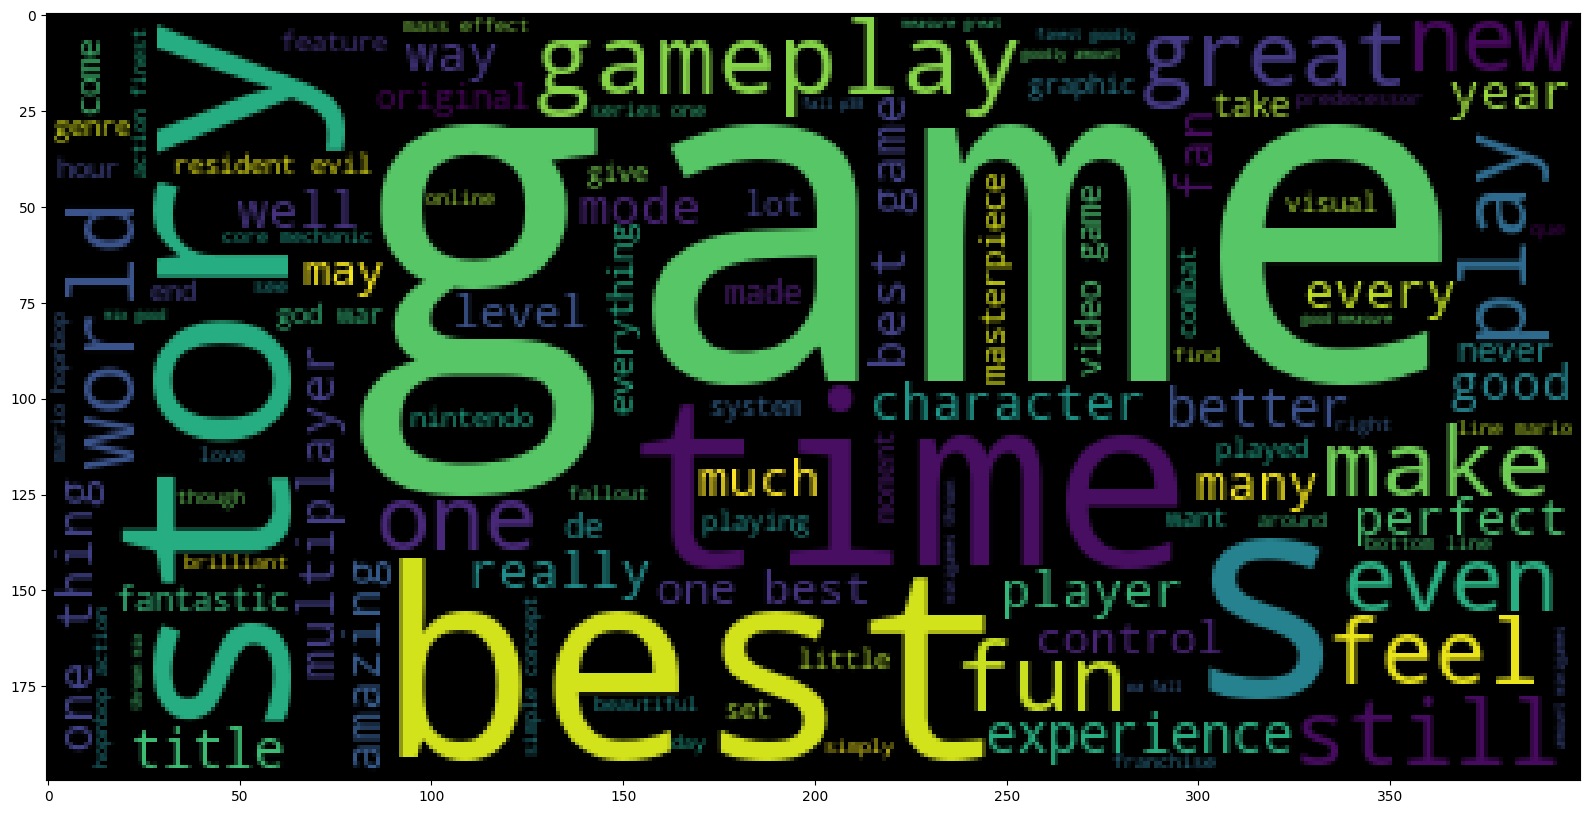

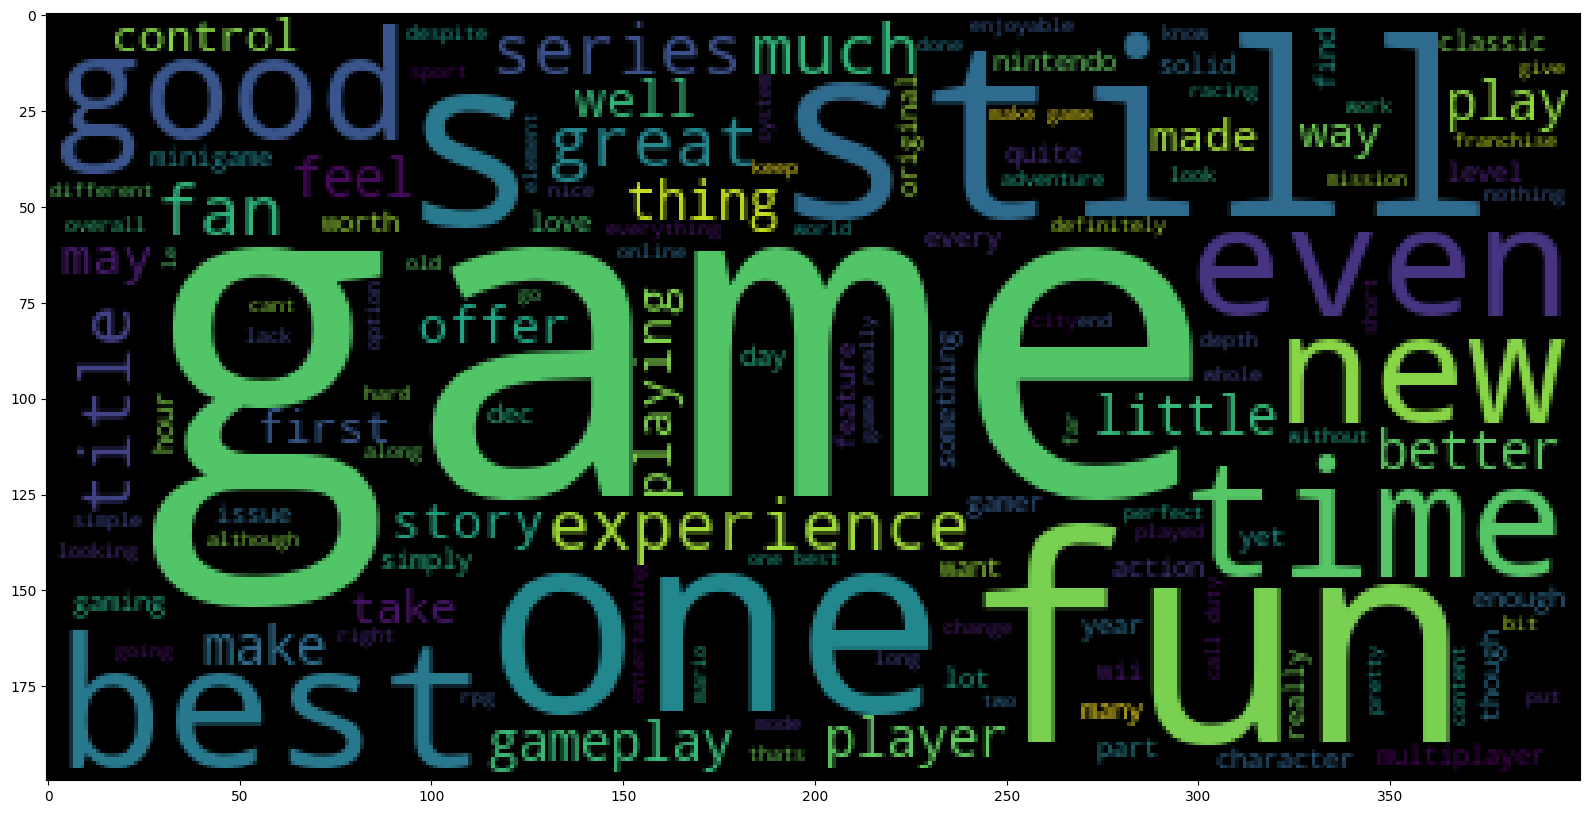

In [89]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from wordcloud import WordCloud

# Ensure you have necessary components
nltk.download('stopwords')
nltk.download('wordnet')

# Prepare stop words, punctuation set, and lemmatizer
stop_words = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop_words])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized


def wordcloud_generator(dataframe):
    # Extract 'Review' column into a list
    reviews_list = dataframe['Review'].astype(str).tolist()

    # Assuming cleaned_reviews_words is a list of lists, where each sublist is a list of words from a review
    cleaned_reviews_words = [clean(review) for review in reviews_list]

    freqdist = Counter(cleaned_reviews_words)


    cleaned = ' '.join(cleaned_reviews_words)
    wordcloud = WordCloud().generate(cleaned)
    fig, ax = plt.subplots(figsize=(16, 12))
    ax.imshow(wordcloud, interpolation='nearest')
    plt.tight_layout()

#define what worldclouds we need
gamerevs = pd.read_csv('game_reviews.csv')
highly_rated_games = gamerevs[gamerevs['Score']>90]
low_rated_games = gamerevs[gamerevs['Score']<65]

wordcloud_generator(highly_rated_games)
wordcloud_generator(low_rated_games)



The other insights are the story is much more mentioned in the highly rated games, tha in the low rated games, this could mean that a good story is what a game needs to be highly acclaimed.
Also time is much more often mentioned, and could be investigated, but a hunch is that it could be mentioned in the context of 'it respects your time. 
Multiplayer is more often mentioned in in the highly rated games worldcloud.

To summarize:
I did a complicated webscrpaing, using generic terms and turned them into usable websites to scrape.
Additionally I openned a csv with multiply reviews, and score, but that can be optimised and bugs can be fixed.
And I did get a basic  world coud of highly and lowly rateded games